# Diabetes

### Описание данных

* Diabetes_012  -  0 = no diabetes 1 = prediabetes 2 = diabetes:
* HighBP  -  0 = no high BP 1 = high BP;
* HighChol  -  0 = no high cholesterol 1 = high cholesterol;
* CholCheck  -  0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years;
* BMI  -  Body Mass Index;
* Smoker  -  Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no 1 = yes;
* Stroke  -  (Ever told) you had a stroke. 0 = no 1 = yes (инсульт);
* HeartDiseaseorAttack  -  coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes (инфаркт);
* PhysActivity  -  physical activity in past 30 days - not including job 0 = no 1 = yes;
* Fruits -  Consume Fruit 1 or more times per day 0 = no 1 = yes;
* Veggies  -  Consume Vegetables 1 or more times per day 0 = no 1 = yes;
* HvyAlcoholConsump  -  Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) 0 = no;
* GenHlth  -  Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor;
* AnyHealthcare  -  Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no 1 = yes;
* NoDocbcCost  -  Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no 1 = yes;
* MentHlth  -  Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how;
* PhysHlth  -  Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30;
* DiffWalk  -  Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes;
* Sex  -  0 = female 1 = male;
* Age  -  13-level age category (_AGEG5YR see codebook) 1 = 18-24 9 = 60-64 13 = 80 or older;
* Education  -  Education level (EDUCA see codebook) scale 1-6 1 = Never attended school or only kindergarten 2 = Grades 1 through 8;
* Income  -  Income scale (INCOME2 see codebook) scale 1-8 1 = less than $10,000 5 = less than $35,000 8 = $75,000 or more;

Импортируем необходимые для работы библиотеки

In [1]:
#pip install lightgbm

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool
from optuna.integration import CatBoostPruningCallback
from sklearn.utils import shuffle
RAND = 12345
#!pip install optuna
import optuna
from optuna.samplers import TPESampler, RandomSampler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.inspection import permutation_importance

import matplotlib.pyplot as plt
import lightgbm as lgb
from lightgbm import LGBMClassifier
import sklearn
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std
from sklearn.svm import SVC


Откроем датасет и посмотрим на его первые 5 строк

In [3]:
df = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')
df.head()

Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   
1          1.0      3.0       0.0       0.0       0.0  0.0   7.0        6.0   
2          1.0      5.0      30.0      30.0       1.0  0.0   9.0        4.0   
3          0.0      2.0       0.0       0.0       0.0  0.0  11.0        3.0   
4          0.0      2.0       3.0       0.0       0.0  0.0  11.0        5.0   

   Income  
0     3.0  
1     1.0  
2     8.0  
3     6.0  
4     4.0  

[5 rows x 22 columns]

Проверим на наличие пропусков и формат столбцлв

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

В данных пропусков нет, все данные в формате float. Переведем данные в целочисленный формат

In [5]:
df[['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']] = df[['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_012          253680 non-null  int32
 1   HighBP                253680 non-null  int32
 2   HighChol              253680 non-null  int32
 3   CholCheck             253680 non-null  int32
 4   BMI                   253680 non-null  int32
 5   Smoker                253680 non-null  int32
 6   Stroke                253680 non-null  int32
 7   HeartDiseaseorAttack  253680 non-null  int32
 8   PhysActivity          253680 non-null  int32
 9   Fruits                253680 non-null  int32
 10  Veggies               253680 non-null  int32
 11  HvyAlcoholConsump     253680 non-null  int32
 12  AnyHealthcare         253680 non-null  int32
 13  NoDocbcCost           253680 non-null  int32
 14  GenHlth               253680 non-null  int32
 15  MentHlth              253680 non-n

Это медицинские данные, данные обезличины и дубликаты вполне естественны, но наличие дубликатов помешает модели обучится корректно. Проверим на наличие дубликатов.

In [6]:
df.duplicated().sum()

23899

Удалим дубликаты

In [7]:
df = df.drop_duplicates()

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

Diabetes_012         HighBP       HighChol      CholCheck  \
count  229781.000000  229781.000000  229781.000000  229781.000000   
mean        0.325627       0.454441       0.441760       0.959535   
std         0.724623       0.497921       0.496598       0.197047   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       1.000000   
50%         0.000000       0.000000       0.000000       1.000000   
75%         0.000000       1.000000       1.000000       1.000000   
max         2.000000       1.000000       1.000000       1.000000   

                BMI         Smoker         Stroke  HeartDiseaseorAttack  \
count  229781.00000  229781.000000  229781.000000         229781.000000   
mean       28.68567       0.465661       0.044756              0.103216   
std         6.78636       0.498821       0.206767              0.304241   
min        12.00000       0.000000       0.000000              0.000000   
25%        24.00000       0.000000       0.000000              0.000000   
50%        27.00000       0.000000       0.000000              0.000000   
75%        32.00000       1.000000       0.000000              0.000000   
max        98.00000       1.000000       1.000000              1.000000   

        PhysActivity         Fruits  ...  AnyHealthcare    NoDocbcCost  \
count  229781.000000  229781.000000  ...  229781.000000  229781.000000   
mean        0.733355       0.612966  ...       0.946075       0.092810   
std         0.442206       0.487073  ...       0.225871       0.290167   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         0.000000       0.000000  ...       1.000000       0.000000   
50%         1.000000       1.000000  ...       1.000000       0.000000   
75%         1.000000       1.000000  ...       1.000000       0.000000   
max         1.000000       1.000000  ...       1.000000       1.000000   

             GenHlth       MentHlth       PhysHlth       DiffWalk  \
count  229781.000000  229781.000000  229781.000000  229781.000000   
mean        2.601151       3.505373       4.675178       0.185507   
std         1.064685       7.713725       9.046568       0.388709   
min         1.000000       0.000000       0.000000       0.000000   
25%         2.000000       0.000000       0.000000       0.000000   
50%         3.000000       0.000000       0.000000       0.000000   
75%         3.000000       2.000000       4.000000       0.000000   
max         5.000000      30.000000      30.000000       1.000000   

                 Sex            Age      Education         Income  
count  229781.000000  229781.000000  229781.000000  229781.000000  
mean        0.439231       8.086582       4.980568       5.890383  
std         0.496295       3.093809       0.992895       2.092477  
min         0.000000       1.000000       1.000000       1.000000  
25%         0.000000       6.000000       4.000000       5.000000  
50%         0.000000       8.000000       5.000000       6.000000  
75%         1.000000      10.000000       6.000000       8.000000  
max         1.000000      13.000000       6.000000       8.000000  

[8 rows x 22 columns]

По калькулятору BMI мы можем сделать вывод, что в столбце BMI наблюдаются выбросы

<Axes: >

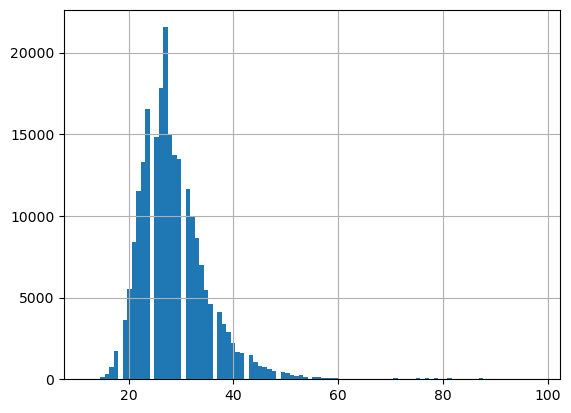

In [10]:
df['BMI'].hist(bins=100)

<Axes: >

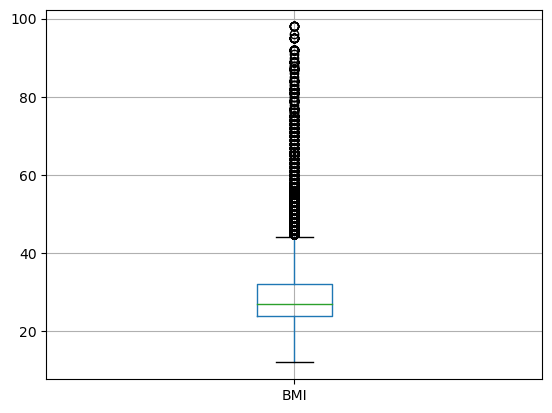

In [11]:
df.boxplot(column=['BMI'])

<Axes: xlabel='Diabetes_012', ylabel='BMI'>

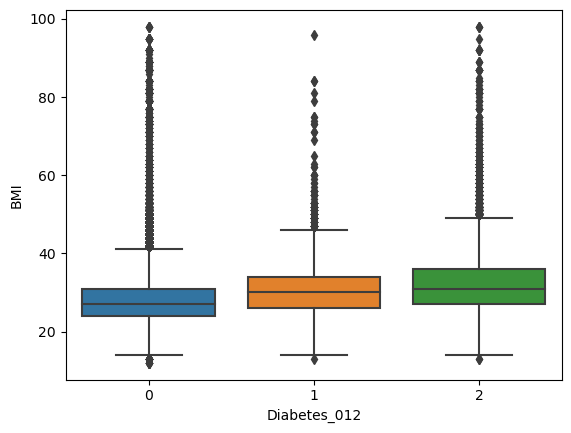

In [12]:
sns.boxplot(x = 'Diabetes_012', y = 'BMI', data = df)

Избавимся от выбросов в столбце BMI

In [13]:
lower_threshold = df['BMI'].quantile(0.25) - 1.5 * (df['BMI'].quantile(0.75) - df['BMI'].quantile(0.25))
upper_threshold = df['BMI'].quantile(0.75) + 1.5 * (df['BMI'].quantile(0.75) - df['BMI'].quantile(0.25))

# Фильтрация и удаление строк с выбросами в столбце 'BMI'
df_filtered = df[(df['BMI'] >= lower_threshold) & (df['BMI'] <= upper_threshold)]

# Вывод отфильтрованного датасета
df_filtered.describe()

Diabetes_012         HighBP       HighChol      CholCheck  \
count  224143.000000  224143.000000  224143.000000  224143.000000   
mean        0.315223       0.449552       0.440799       0.959147   
std         0.714994       0.497450       0.496484       0.197951   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       1.000000   
50%         0.000000       0.000000       0.000000       1.000000   
75%         0.000000       1.000000       1.000000       1.000000   
max         2.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke  HeartDiseaseorAttack  \
count  224143.000000  224143.000000  224143.000000         224143.000000   
mean       28.077214       0.466461       0.044588              0.102747   
std         5.410090       0.498875       0.206397              0.303629   
min        12.000000       0.000000       0.000000              0.000000   
25%        24.000000       0.000000       0.000000              0.000000   
50%        27.000000       0.000000       0.000000              0.000000   
75%        31.000000       1.000000       0.000000              0.000000   
max        44.000000       1.000000       1.000000              1.000000   

       PhysActivity         Fruits  ...  AnyHealthcare    NoDocbcCost  \
count  224143.00000  224143.000000  ...  224143.000000  224143.000000   
mean        0.73843       0.615000  ...       0.946472       0.091281   
std         0.43949       0.486596  ...       0.225085       0.288009   
min         0.00000       0.000000  ...       0.000000       0.000000   
25%         0.00000       0.000000  ...       1.000000       0.000000   
50%         1.00000       1.000000  ...       1.000000       0.000000   
75%         1.00000       1.000000  ...       1.000000       0.000000   
max         1.00000       1.000000  ...       1.000000       1.000000   

             GenHlth       MentHlth       PhysHlth       DiffWalk  \
count  224143.000000  224143.000000  224143.000000  224143.000000   
mean        2.582963       3.428793       4.557300       0.177886   
std         1.059038       7.622956       8.937287       0.382418   
min         1.000000       0.000000       0.000000       0.000000   
25%         2.000000       0.000000       0.000000       0.000000   
50%         3.000000       0.000000       0.000000       0.000000   
75%         3.000000       2.000000       4.000000       0.000000   
max         5.000000      30.000000      30.000000       1.000000   

                 Sex            Age      Education         Income  
count  224143.000000  224143.000000  224143.000000  224143.000000  
mean        0.442182       8.109979       4.985451       5.912471  
std         0.496647       3.100621       0.991841       2.082242  
min         0.000000       1.000000       1.000000       1.000000  
25%         0.000000       6.000000       4.000000       5.000000  
50%         0.000000       8.000000       5.000000       6.000000  
75%         1.000000      10.000000       6.000000       8.000000  
max         1.000000      13.000000       6.000000       8.000000  

[8 rows x 22 columns]

In [14]:
df = df_filtered

<Axes: >

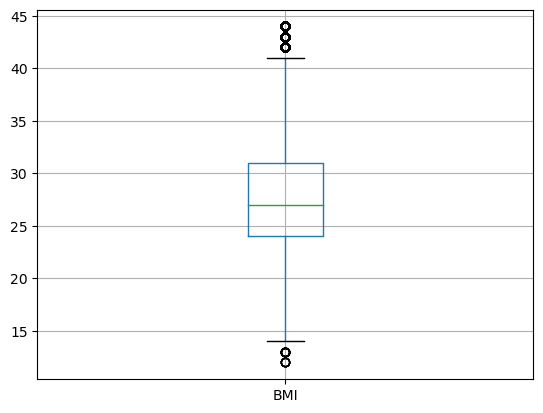

In [15]:
df.boxplot(column=['BMI'])

Посмотрим корреляцию признаков с целевым признаком

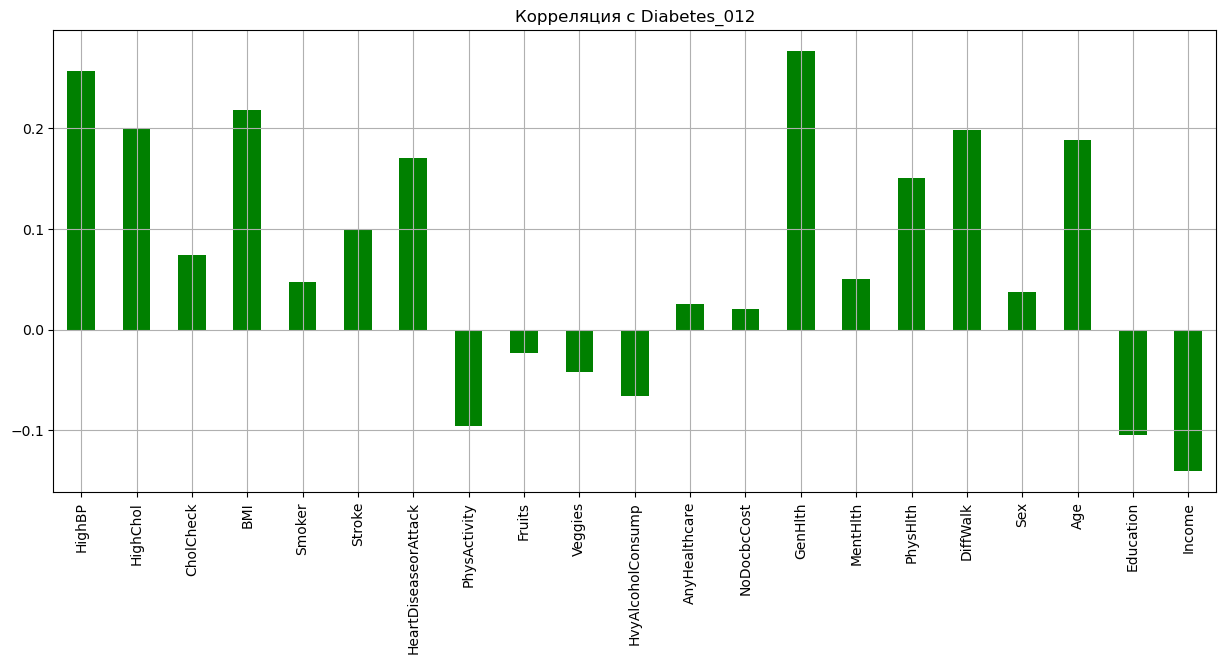

In [16]:
df.drop('Diabetes_012', axis=1).corrwith(df.Diabetes_012).plot(kind='bar', grid=True, figsize=(15, 6)
, title="Корреляция с Diabetes_012",color="green");

Для лучшего результата предсказания модели удалим столбцы с наименее важной информацией

In [17]:
df = df.drop(['CholCheck', 'AnyHealthcare', 'NoDocbcCost', 'MentHlth', 
              'PhysActivity', 'HvyAlcoholConsump', 'Veggies'], axis=1)

Для проверки зависимости показателей визуализируем показатели

<Axes: >

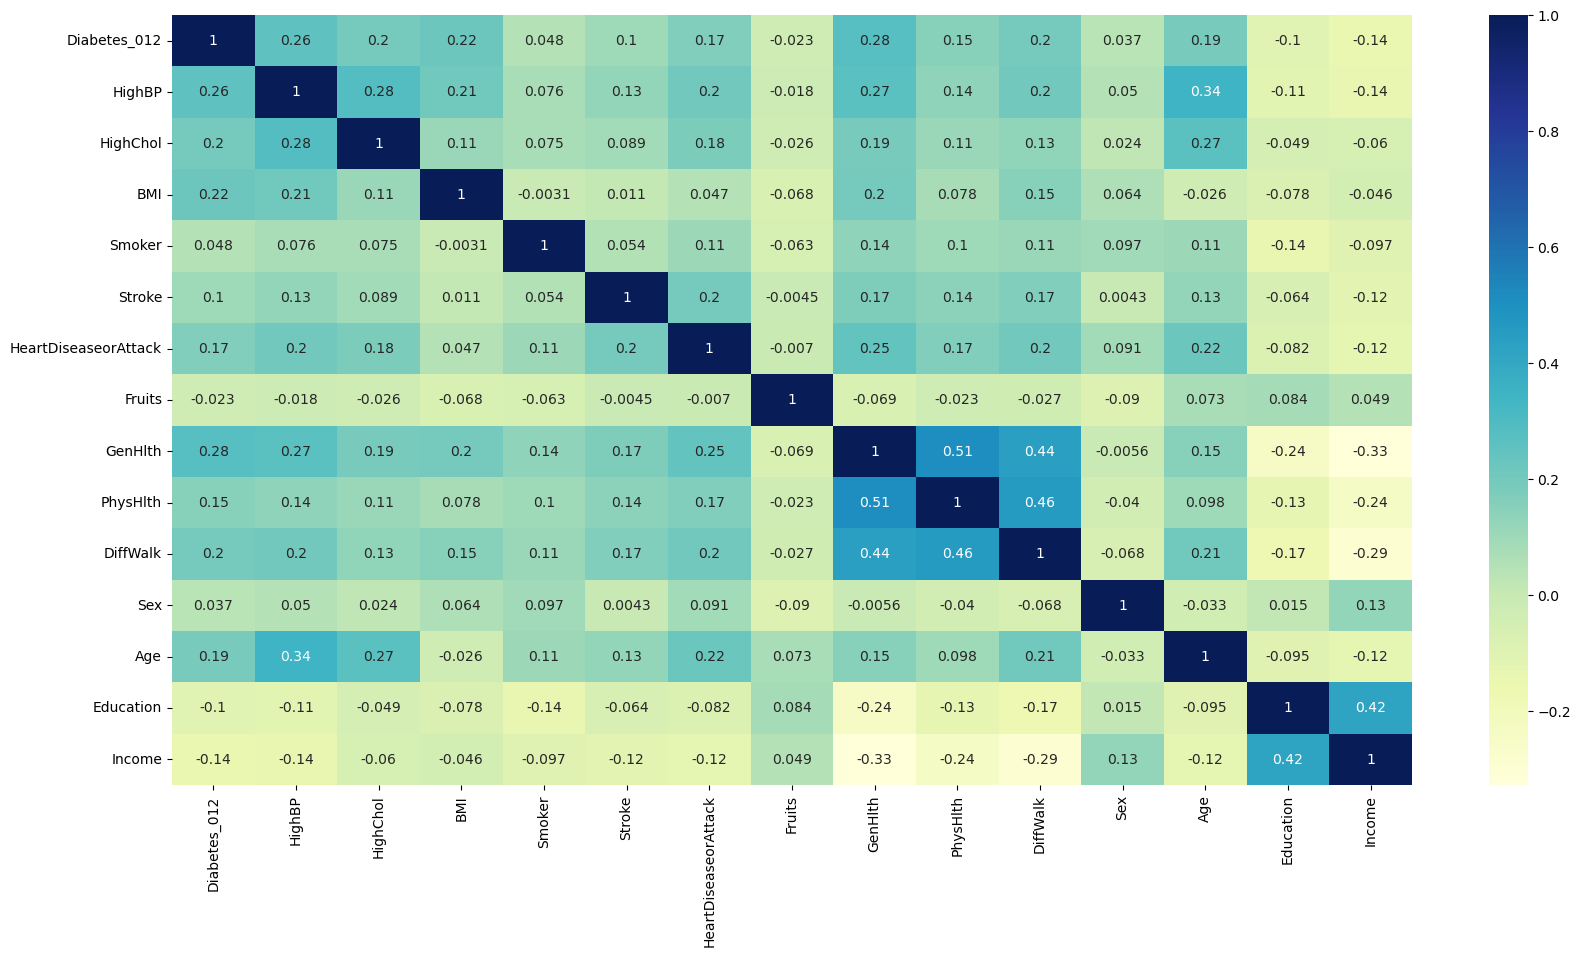

In [18]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

In [19]:
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'Fruits', 'GenHlth', 'PhysHlth', 'DiffWalk',
       'Sex', 'Age', 'Education', 'Income'],
      dtype='object')

Посмотрим диагноз пациентов в процентном соотношении 

(-1.25, 1.25, -1.25, 1.25)

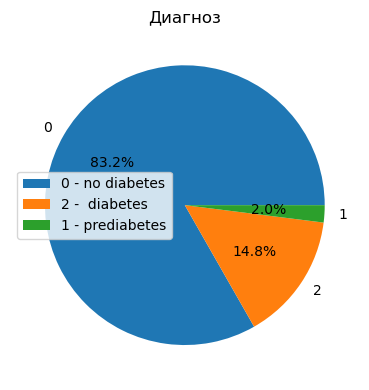

In [20]:
df.Diabetes_012.value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(4,4))
plt.legend(['0 - no diabetes', '2 -  diabetes', '1 - prediabetes'])
plt.title('Диагноз')
plt.tight_layout()
plt.axis('off')

In [21]:
df['Diabetes_012'].value_counts()

0    186589
2     33101
1      4453
Name: Diabetes_012, dtype: int64

Мы видим дисбаланс классов

## Обучение моделей

Разделим наши данные на признаки  целевой признак

In [22]:
X = df.drop(['Diabetes_012'], axis=1)
y = df['Diabetes_012']

In [23]:
y.describe()

count    224143.000000
mean          0.315223
std           0.714994
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           2.000000
Name: Diabetes_012, dtype: float64

## Борьба с дисбалансом

Для решения проблемы дисбаланса классов напишем функцию, которая умножит количество наблюдаемых с диагнозом преддиабет, а также функцию, которая уменшит количество здоровых наблюдаемых

In [24]:
def upsample(X, y, repeat):
    X_zeros = X[y == 0]
    X_ones = X[y == 1]
    X_two = X[y == 2]
    y_zeros = y[y == 0]
    y_ones = y[y == 1]
    y_two = y[y == 2]

    X_upsampled = pd.concat([X_zeros] + [X_ones]  * repeat * repeat + [X_two])
    y_upsampled = pd.concat([y_zeros] + [y_ones] * repeat * repeat + [y_two])
    
    X_upsampled, y_upsampled = shuffle(
        X_upsampled, y_upsampled, random_state=12345)
    
    return X_upsampled, y_upsampled

X_upsampled, y_upsampled = upsample(X, y, 2)

In [25]:
def downsample(X_upsampled,y_upsampled, fraction):
    X_zeros = X_upsampled[y_upsampled == 0]
    X_ones = X_upsampled[y_upsampled == 1]
    X_two = X_upsampled[y_upsampled == 2]
    y_zeros = y_upsampled[y_upsampled == 0]
    y_ones = y_upsampled[y_upsampled == 1]
    y_two = y_upsampled[y_upsampled == 2]
    
    X_downsampled = pd.concat(
       [X_zeros.sample(frac=fraction, random_state=12345)] + [X_ones] + [X_two])
    y_downsampled = pd.concat(
       [y_zeros.sample(frac=fraction, random_state=12345)] + [y_ones] + [y_two])
    
    X_downsampled, y_downsampled= shuffle(
        X_downsampled, y_downsampled, random_state=12345)
    
    return X_downsampled, y_downsampled

X_downsampled, y_downsampled = downsample(X_upsampled, y_upsampled, 0.1)

In [26]:
y_downsampled.value_counts()

2    33101
0    18659
1    17812
Name: Diabetes_012, dtype: int64

Теперь дисбаланс не на столько критичен

Разделим данные на обучающую и тестовую выборки в соотношении 70/30

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_downsampled, y_downsampled, test_size = 0.3, random_state=RAND)

In [28]:
y_train.value_counts()

2    23148
0    13139
1    12413
Name: Diabetes_012, dtype: int64

In [29]:
df.fillna(0, inplace=True)

In [30]:
df.dropna(subset=['BMI'], inplace=True)
df.isna().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
Fruits                  0
GenHlth                 0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

## Обучение моделей

## 1. RandomForestClassifier

Обучим модель без подбора гиперпараметров

In [31]:
model_rf = RandomForestClassifier(random_state=RAND)
model_rf.fit(X_train, y_train)
predictions_rf = model_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, predictions_rf)
print('Result RF:', accuracy_rf)

Result RF: 0.782292065925642


In [32]:
without_hyperparameters = []
without_hyperparameters.append({'RandomForestClassifier':accuracy_rf})

С помощью цикла подберем лучший результат в промежутке заданных параметров

In [33]:
%time
result_rf =[]
for depth in range(1, 10):
    for est in range(10, 101, 10):
        model = RandomForestClassifier(random_state=RAND, n_estimators=est, max_depth=depth)
        model.fit(X_train, y_train)
        predictions_test_rf = model.predict(X_test)
        accuracy_test = accuracy_score(y_test, predictions_test_rf)
        result_rf.append({'Model name': 'RandomForestClassifier',
                         'Hyperparameters': {'random_state':123,
                                            'n_estimators': est,
                                            'max_depth': depth},
                         'Accuracy score': accuracy_test})

CPU times: total: 0 ns
Wall time: 0 ns


In [34]:
diagnos_rf = pd.DataFrame.from_dict(result_rf)
diagnos_rf[diagnos_rf['Accuracy score'] == diagnos_rf['Accuracy score'].max()]

Model name                                    Hyperparameters  \
81  RandomForestClassifier  {'random_state': 123, 'n_estimators': 20, 'max...   

    Accuracy score  
81          0.5757

In [35]:
best_results =[]
best_results.append(diagnos_rf.loc[81])

In [36]:
print(classification_report(y_test, predictions_test_rf))

              precision    recall  f1-score   support

           0       0.59      0.52      0.55      5520
           1       0.69      0.04      0.08      5399
           2       0.57      0.90      0.69      9953

    accuracy                           0.57     20872
   macro avg       0.62      0.49      0.44     20872
weighted avg       0.60      0.57      0.50     20872



In [37]:
confusion_matrix(y_test, predictions_test_rf)

array([[2856,   37, 2627],
       [ 977,  227, 4195],
       [ 971,   67, 8915]], dtype=int64)

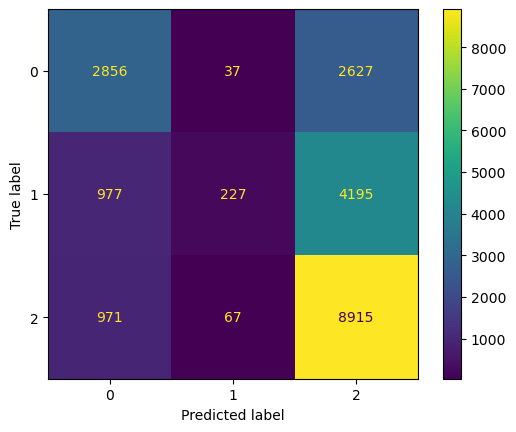

In [38]:
cm = confusion_matrix(y_test, predictions_test_rf, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model.classes_)
disp.plot()
plt.show()

### Вывод

Показатель acuracy у модели без подбора гиперпараметров лучше, но по матрице ошибок видно как сильно ошибается модель. С подбором гиперпараметров показатель accuracy снизился, матрица ошибок показывает очень плохой результат

## 2. DecisionTreeClassifier

Со параметрами по умолчанию

In [39]:
model_dt = DecisionTreeClassifier(random_state=123)
model_dt.fit(X_train, y_train)
predictions_test = model_dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, predictions_test)
print('Result DT:', accuracy_dt)

Result DT: 0.6792832502874665


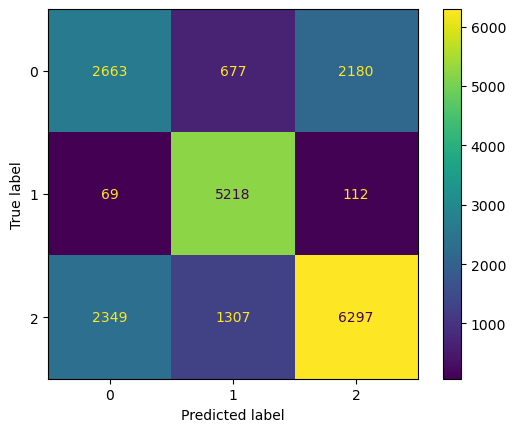

In [40]:
cm = confusion_matrix(y_test, predictions_test, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model.classes_)
disp.plot()
plt.show()

In [41]:
without_hyperparameters.append({'DecisionTreeClassifier':accuracy_dt})

Подбор параметра depth

In [42]:
result_dt = []
for depth in range(1,10):
    model = DecisionTreeClassifier(random_state=RAND, max_depth=depth)
    model.fit(X_train, y_train)
    predictions_test_dt = model.predict(X_test)
    accuracy_test = accuracy_score(y_test, predictions_test_dt)
    result_dt.append({'Model name': 'DecisionTreeClassifier',
                     'Hyperparameters': {'random_state': 123, 'max_depth':depth},
                                        'Accuracy score': accuracy_test})

In [43]:
diagnos_dt = pd.DataFrame.from_dict(result_dt)
diagnos_dt[diagnos_dt['Accuracy score'] == diagnos_dt['Accuracy score'].max()]

Model name                        Hyperparameters  \
8  DecisionTreeClassifier  {'random_state': 123, 'max_depth': 9}   

   Accuracy score  
8        0.566453

In [44]:
best_results.append(diagnos_dt.loc[8])

In [45]:
print(classification_report(y_test, predictions_test_dt))

              precision    recall  f1-score   support

           0       0.60      0.49      0.54      5520
           1       0.41      0.17      0.24      5399
           2       0.58      0.82      0.68      9953

    accuracy                           0.57     20872
   macro avg       0.53      0.50      0.49     20872
weighted avg       0.54      0.57      0.53     20872



In [46]:
confusion_matrix(y_test, predictions_test_dt)

array([[2726,  549, 2245],
       [ 853,  929, 3617],
       [ 991,  794, 8168]], dtype=int64)

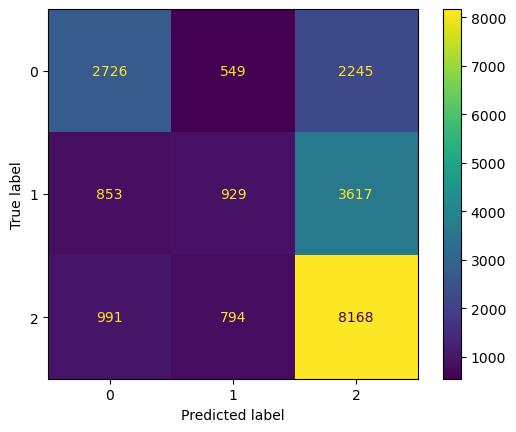

In [47]:
cm = confusion_matrix(y_test, predictions_test_dt, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model.classes_)
disp.plot()
plt.show()

### Вывод

Наблюдается похожая с моделью RandomForest ситуация - без параметров показатель accuracy больше, чем с подбором параметров. Матрица ошибок показывает также очень плохой результат 

## Сравнение Моделей

Для начала сравним модели без подбора гиперпараметров

In [48]:
pd.DataFrame(without_hyperparameters)

RandomForestClassifier  DecisionTreeClassifier
0                0.782292                     NaN
1                     NaN                0.679283

По результатам из таблицы видим, что DecisionTreeClassifier лучше справилась с задачей, чем RandomForestClassifier. LogisticRegression показал результат хуже 

Теперь результат работы моделей с перебором параметров

In [49]:
pd.DataFrame(best_results)

Model name                                    Hyperparameters  \
81  RandomForestClassifier  {'random_state': 123, 'n_estimators': 20, 'max...   
8   DecisionTreeClassifier              {'random_state': 123, 'max_depth': 9}   

    Accuracy score  
81        0.575700  
8         0.566453

### Вывод

Все 3 модели показали примерно одинаково плохой результат при подборе параметров

# Обучение моделей с использованием кросс-валидации

Напишем функцию для обучения моделей по новым данным и обучим новые модели с ипользованием кросс-валидации

In [50]:
def checkstat (model, X_train, y_train): 
    model.fit(X_train, y_train)
    predicted_test=model.predict(X_test)
    print('Accuracy :', accuracy_score(y_test, predicted_test))
    print("F1:", f1_score(y_test, predicted_test, average='micro'))
    print('recall:', recall_score(y_test, predicted_test, average='micro'))
    print('precision:', precision_score(y_test, predicted_test, average='micro'))
    cm = confusion_matrix(y_test, predicted_test, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model.classes_)
    disp.plot()
    plt.show()

## CatBoost

In [51]:
train_pool = Pool (
    X_train,
    y_train

)
test_pool = Pool (
    X_test,
   y_test
)

In [52]:
EVAL = 'TotalF1'

In [53]:
def objective(trial):

   # это гиперпараметры, которые будем проверять. 
    param = {
       # suggest_int и suggest_float - непрерывные переменные. выбирает из диапазона от-до. 
       # можно ставить шаг (как стоит у регуляризации), чтоб он не тыкался +- сотые :)
        'learning_rate':trial.suggest_float('learning_rate', 0.01, 0.1, log=True),
        'l2_leaf_reg':trial.suggest_float('l2_leaf_reg', 2.0, 20.0, step=1),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 10, 500),
        'depth': trial.suggest_int('depth', 3, 12),
       
       # suggest_categorical - выбор из списка.
        'grow_policy': trial.suggest_categorical('grow_policy', ['SymmetricTree', 'Lossguide', 'Depthwise']),
        'bootstrap_type': trial.suggest_categorical('bootstrap_type', ['Bayesian', 'Bernoulli']), 
      
    }
    # эти гиперпараметры тоже подбираем, но отдельно, в зависимости от выбранного bootstrap_type
   # если делать одним куском, то будет падать
    if param["bootstrap_type"] == "Bayesian":
        param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
    elif param["bootstrap_type"] == "Bernoulli":
        param["subsample"] = trial.suggest_float("subsample", 0.1, 0.99)
    cat_model = CatBoostClassifier(**param, 
                                   iterations=3000,
                                   random_state=12345,
                                   eval_metric=EVAL,
                                   verbose=0, 
                                   leaf_estimation_method='Newton',
                                #   task_type='GPU',
                                   early_stopping_rounds=120,  
                               #   custom_metric=['AUC', 'NormalizedGini'],
                                   )
    
   # это интеграция. прунер - фиговинка, которая сама прервет эксперимент, если ей что-то не понравится
   # не особо давно добавили и иногда глючит. но с ним лучше
    pruning_callback = CatBoostPruningCallback(trial, EVAL)
   
    cat_model.fit(train_pool, eval_set=test_pool)
   
    pruning_callback.check_pruned()
   
   # результат в процессе оно не печатает, хоть так.
    print(param)
    print(cat_model.best_score_)
    print('________________')
    return cat_model.best_score_['validation'][EVAL]

In [54]:
optuna.logging.set_verbosity(optuna.logging.WARNING)

# семплер - что-то типа способа подбора параметров. 
# первые раз 20 лучше запустить RandomSampler(), он работает по принципу RandomizedSearchCV из sklearn
# помогает приблизительно оценить интервалы параметров. потом в функции оптимизации порезать :)
# сам TPESampler рекомендуют запускать под сотню раз. 
sampler = TPESampler(seed=RAND) 
# объявление процесса подбора
# для TPESampler используют прунер HyperbandPruner()
# для RandomSampler - прунер MedianPruner()
study = optuna.create_study(study_name="catboost", 
                            direction="maximize",
                            pruner=optuna.pruners.HyperbandPruner(),
                            sampler=sampler)
# study тут создается новый, а вообще можно его сохранять/загружать, 
# если хочется продолжить подбор на том же наборе данных

In [55]:
# это уже запуск попыток. n_trials количество. можно поставить время timeout
study.optimize(objective, n_trials=5)

{'learning_rate': 0.08503859825373385, 'l2_leaf_reg': 8.0, 'min_data_in_leaf': 100, 'depth': 5, 'grow_policy': 'Depthwise', 'bootstrap_type': 'Bernoulli', 'subsample': 0.6816771850580444}
{'learn': {'TotalF1': 0.7203174089659876, 'MultiClass': 0.6790091229074161}, 'validation': {'TotalF1': 0.6174389009464879, 'MultiClass': 0.8364281727860146}}
________________
{'learning_rate': 0.05593901428206581, 'l2_leaf_reg': 20.0, 'min_data_in_leaf': 14, 'depth': 4, 'grow_policy': 'Depthwise', 'bootstrap_type': 'Bernoulli', 'subsample': 0.7440799587587585}
{'learn': {'TotalF1': 0.6040094688514809, 'MultiClass': 0.8188286546114346}, 'validation': {'TotalF1': 0.5539948942692504, 'MultiClass': 0.8865579427971095}}
________________
{'learning_rate': 0.043901092488902525, 'l2_leaf_reg': 15.0, 'min_data_in_leaf': 239, 'depth': 6, 'grow_policy': 'Depthwise', 'bootstrap_type': 'Bernoulli', 'subsample': 0.25211368943526663}
{'learn': {'TotalF1': 0.6307623306361474, 'MultiClass': 0.7910483582647856}, 'valid

In [56]:
# красивый график важности гиперпараметров
optuna.visualization.plot_param_importances(study)

In [57]:
# лучшая метрика
study.best_trial.value
# гиперпараметры, для которых она достигнута
study.best_trial.params

{'learning_rate': 0.08503859825373385,
 'l2_leaf_reg': 8.0,
 'min_data_in_leaf': 100,
 'depth': 5,
 'grow_policy': 'Depthwise',
 'bootstrap_type': 'Bernoulli',
 'subsample': 0.6816771850580444}

In [58]:
catboost = CatBoostClassifier(random_state=RAND, silent=True)
catboost_params = {
    'learning_rate': 0.08503859825373385,
     'l2_leaf_reg': 8.0,
     'min_data_in_leaf': 100,
     'depth': 5,
     'grow_policy': 'Depthwise',
     'bootstrap_type': 'Bernoulli',
     'bagging_temperature': 0.6816771850580444
}

catboost.fit(train_pool, eval_set=test_pool) 
catboost.best_score_

{'learn': {'MultiClass': 0.7307177816497954},
 'validation': {'MultiClass': 0.8535944962542519}}

Accuracy : 0.6098121885779992
F1: 0.6098121885779992
recall: 0.6098121885779992
precision: 0.6098121885779992


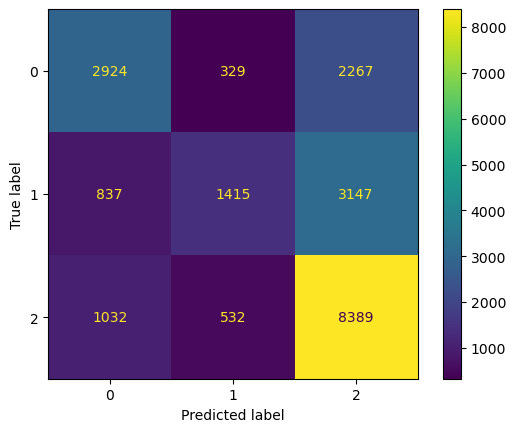

In [59]:
checkstat(catboost, X_train, y_train)

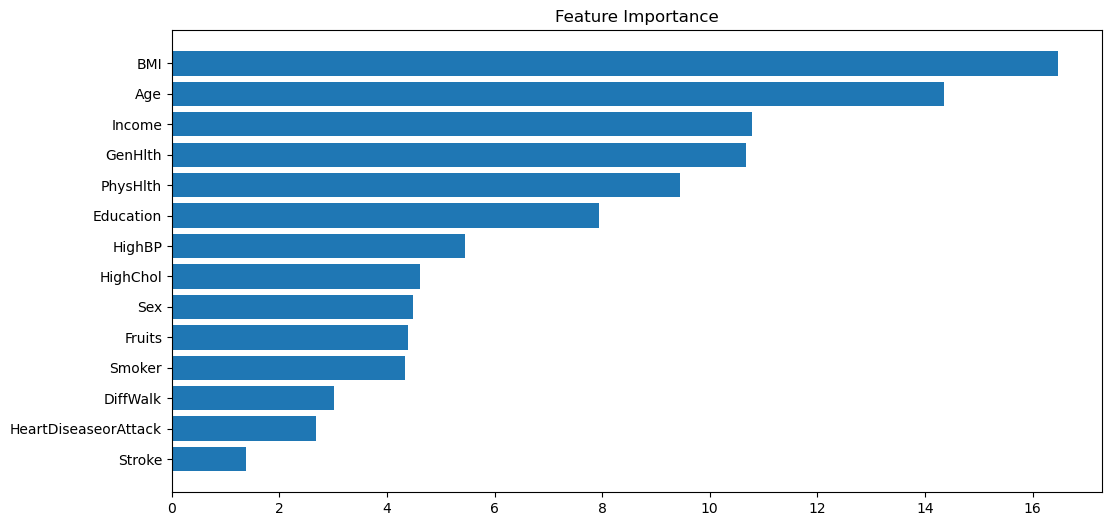

In [60]:
feature_importance = catboost.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_train.columns)[sorted_idx])
plt.title('Feature Importance');


### Вывод

Catboost с подбором параметров с помощью optuna показал также не очень хороший результат

##  DecisionTreeClassifier

In [61]:
model_dtc = DecisionTreeClassifier(random_state=12345, max_depth=5)
scores = cross_val_score(model_dtc, X_upsampled, y_upsampled, cv = 5, scoring = 'accuracy')
scores

array([0.78745711, 0.78859392, 0.78995789, 0.78738947, 0.79006316])

Accuracy : 0.5579244921425833
F1: 0.5579244921425833
recall: 0.5579244921425833
precision: 0.5579244921425833


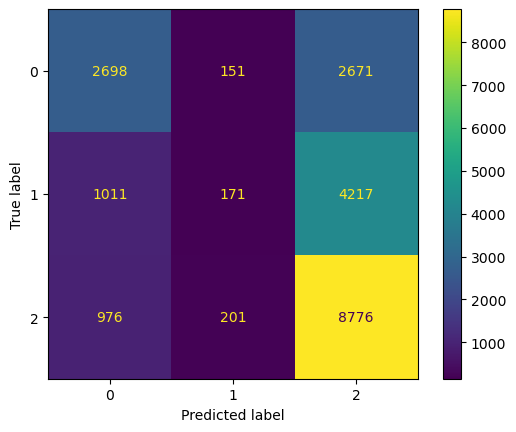

In [62]:
checkstat(model_dtc, X_train, y_train)

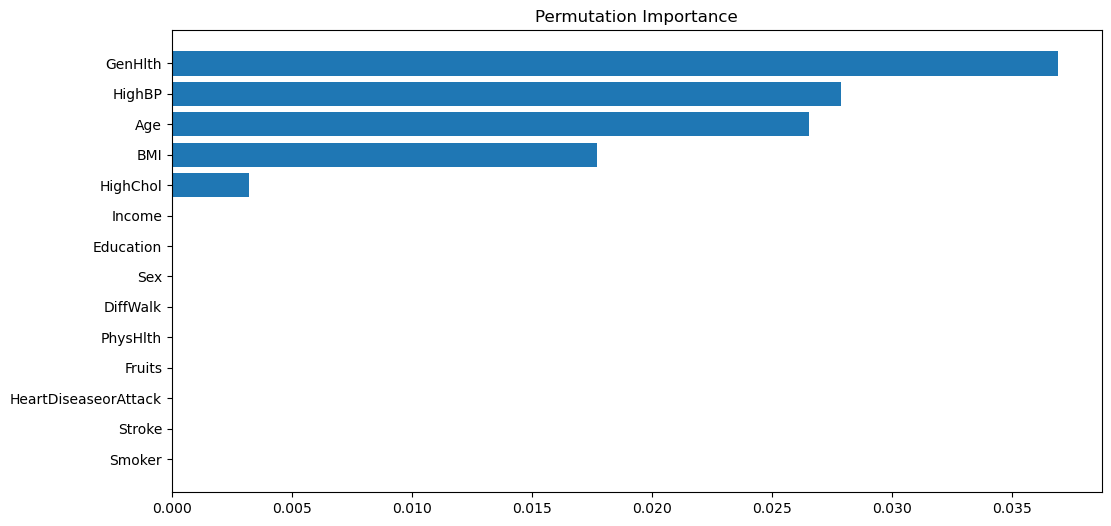

In [63]:
perm_importance = permutation_importance(model_dtc, X_train, y_train, n_repeats=10, random_state=42)
sorted_idx = perm_importance.importances_mean.argsort()
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_train.columns)[sorted_idx])
plt.title('Permutation Importance');

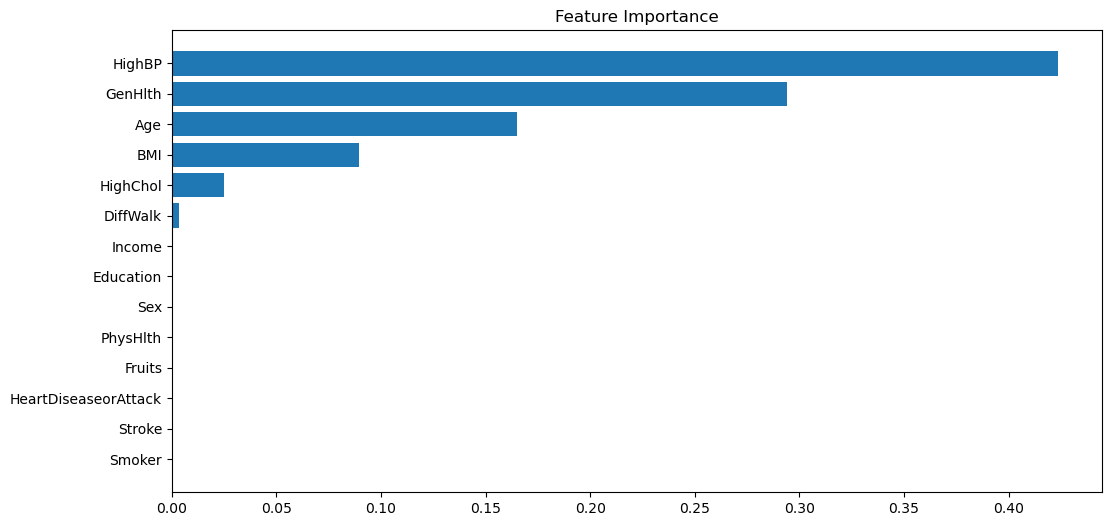

In [64]:
feature_importance = model_dtc.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_train.columns)[sorted_idx])
plt.title('Feature Importance');


### Вывод

DecisionTreeClassifier с применением кросс-валидации результат показывает не лучше, чем просто с подбором параметров

## RandomForestClassifier

In [65]:
model_rfc = RandomForestClassifier(random_state=12345, n_estimators=71, max_depth=5, class_weight='balanced')
scores = cross_val_score(model_rfc, X_upsampled, y_upsampled, cv = 5, scoring = 'accuracy')
scores

array([0.60634513, 0.60897665, 0.60341053, 0.61029474, 0.61221053])

Accuracy : 0.528267535454197
F1: 0.528267535454197
recall: 0.528267535454197
precision: 0.528267535454197


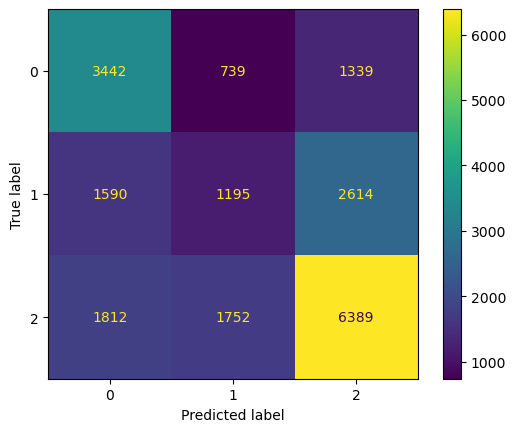

In [66]:
checkstat(model_rfc, X_train, y_train)

### Вывод

RandomForestClassifier с применением кросс-валидации результат показывает хуже, чем просто с побором параметров

##  KNeighborsClassifier

In [67]:
model_KNN = KNeighborsClassifier(n_neighbors = 5)

In [68]:
scores = cross_val_score(model_KNN, X_train, y_train, cv = 5, scoring = 'accuracy')

In [69]:
scores

array([0.55657084, 0.5573922 , 0.55780287, 0.55790554, 0.56078029])

In [70]:
scores.mean()

0.5580903490759754

Accuracy : 0.5825028746646225
F1: 0.5825028746646225
recall: 0.5825028746646225
precision: 0.5825028746646225


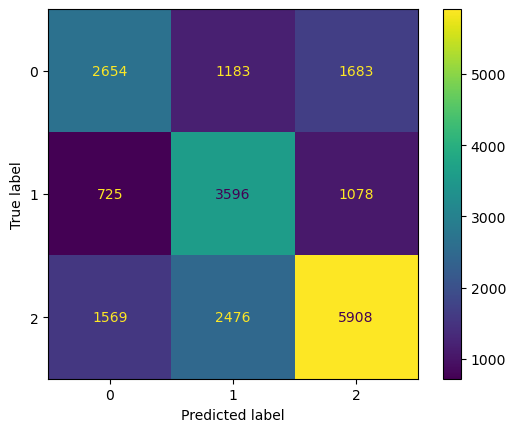

In [71]:
checkstat(model_KNN, X_train, y_train)

Попробуем расширить разбег при подборе гиперпараметров

In [72]:
k_range = range(1,20)
k_scores = []

for k in k_range:
    model_knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(model_knn, X_train, y_train, cv = 5, scoring = 'accuracy')
    k_scores.append(scores.mean())

In [73]:
scores

array([0.55677618, 0.55882957, 0.55420945, 0.55492813, 0.5563655 ])

### Вывод

Метод KNN также не показал хороших результатов. Больший разброс параметров улучшил ситуацию

## LGBM

In [74]:
model = LGBMClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.587 (0.005)


Accuracy : 0.580538520505941
F1: 0.580538520505941
recall: 0.580538520505941
precision: 0.580538520505941


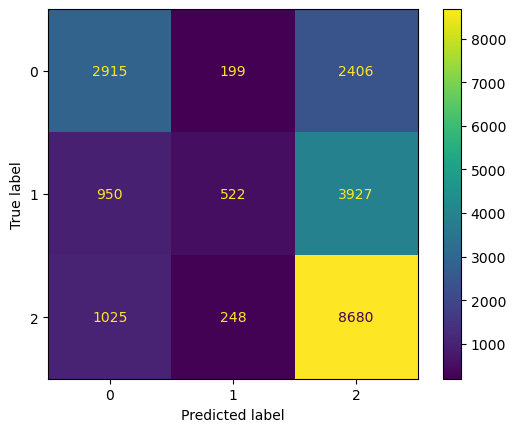

In [75]:
checkstat(model, X_train, y_train)

### Вывод

Модель LGBM показала результат также не удовлетворительный

# Общий вывод

Нам была предоставлена статистика исследований заболеваемости иностранных граждан диабетом за 10 лет. В процессе исследования были произведены следующие работы:

- В результате анализа было выявлено, что некоротые признаки оказывают небольшое влияние, либо вовсе не влиют не диагноз. Было принято решение удалить данные признаки;
- Хоть датасет и содержал обезличенные данные, были удалены дубликаты для улучшения показателей моделей;
- В данных BMI были обнаружены и удалены выбросы;
- Также наблюдался большой дисбаланс классов в целевом признаке. Методами upsample, downsample был исправлен дисбаланс классов;
- Были обучены модели без применения гиперпараметров, далее с применением гиперпараметров. После были обучены новые модели с применением кросс-валидации

В результате исследование нами был сделан вывод, что зависимость между признаками и целевым признаком присутствует, но по каким-то причинам ниодна из моделей не показала хорошего результата.